# HW01
# Student: Pravilov Mikhail

In [100]:
import numpy as np
global_random_seed = 4526
np.random.seed(global_random_seed)

# kNN

1. (8 points) Implement the kNN algorithm and calculate Leave-one-out error on both datasets for 1 to 10 neighbors.

Firsly, let's load our dataset.

In [3]:
import pandas as pd
dataset_root="../Datasets/"

In [4]:
# spam.csv loading
spam_path = dataset_root + 'spam.csv'
spam_data = pd.read_csv(spam_path)
spam_data = spam_data.values
spam_X = spam_data[:, 0:-1].astype('float64')
spam_y = spam_data[:, -1]
print("spam datapoints shape: " + str(spam_X.shape))
print("spam labels shape: " + str(spam_y.shape))

spam datapoints shape: (4601, 57)
spam labels shape: (4601,)


In [5]:
# cancer.csv loading
cancer_path = dataset_root + 'cancer.csv'
cancer_data = pd.read_csv(cancer_path)
cancer_data = cancer_data.values
cancer_X = cancer_data[:, 1:].astype('float64')
cancer_y = cancer_data[:, 0]
print("cancer datapoints shape: " + str(cancer_X.shape))
print("cancer labels shape: " + str(cancer_y.shape))

cancer datapoints shape: (569, 30)
cancer labels shape: (569,)


Then let's see what sklearn gives us. This will be a baseline to check that our implementation of kNN is correct.

In [6]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
k_global = 10
kNNs = [KNeighborsClassifier(n_neighbors=i) for i in range(1, k_global + 1)]

Leave one out error is N-fold cross validation, where N is the number of datapoints

In [7]:
def calculate_loo_error_for_classifiers(classifiers, X, y):
    from sklearn.model_selection import cross_val_score, KFold
    return [1 - cross_val_score(skf, X=X, y=y, cv=KFold(n_splits=y.shape[0]), n_jobs=-1).mean() for skf in classifiers]

In [8]:
# cancer dataset
print("Cancer dataset")
print("<num of neighbours> <loo error>")
cancer_sklearn_loo = calculate_loo_error_for_classifiers(kNNs, cancer_X, cancer_y)
for k, loo_error in enumerate(cancer_sklearn_loo):
    print(str(k + 1) + " " + str(loo_error))

Cancer dataset
<num of neighbours> <loo error>
1 0.08435852372583474
2 0.0773286467486819
3 0.07381370826010547
4 0.07381370826010547
5 0.06678383128295251
6 0.07029876977152905
7 0.06854130052724072
8 0.07029876977152905
9 0.06678383128295251
10 0.07029876977152905


In [154]:
# spam dataset
print("Spam dataset")
print("<num of neighbours> <loo error>")
spam_sklearn_loo = calculate_loo_error_for_classifiers(kNNs, spam_X, spam_y)
for k, loo_error in enumerate(spam_sklearn_loo):
    print(str(k + 1) + " " + str(loo_error))

Spam dataset
<num of neighbours> <loo error>
1 0.16952836339926103
2 0.19061073679634866
3 0.18539447946098675
4 0.19300152140838944
5 0.18582916757226686
6 0.20039121930015213
7 0.19582699413171045
8 0.20104325146707236
9 0.20278200391219303
10 0.2021299717452728


Now let's write our own kNN method.

In [155]:
def get_nearest(k, point_index, X):
    return np.argsort(np.array([np.linalg.norm(X[point_index]-x) for x in X]))[1:k + 1]

def generate_nearest(X, k):
    return np.array([get_nearest(k, i, X) for i in range(X.shape[0])])

def get_class(point_index, nearest_matrix, y, k):
    (nearest_classes, counts) = np.unique(y[nearest_matrix[point_index]][:k], return_counts=True)
    majority_index = np.argmax(counts) 
    return nearest_classes[majority_index]    

In [156]:
def leave_one_out(nearest_matrix, y, k):
    return np.mean([get_class(y_index, nearest_matrix, y, k) != y[y_index] for y_index in range(y.shape[0])])

def leave_one_out_for_all_before_k(X, y, k):
    nearest_matrix = generate_nearest(X, k)
    return [leave_one_out(nearest_matrix, y, i) for i in range(1, k + 1)]

In [157]:
# cancer dataset
print("Cancer dataset")
print("<num of neighbours> <loo error>") 
cancer_loo = leave_one_out_for_all_before_k(cancer_X, cancer_y, k_global)
for k, loo_error in enumerate(cancer_loo):
    print(str(k + 1) + " " + str(loo_error))

Cancer dataset
<num of neighbours> <loo error>
1 0.0843585237258348
2 0.0773286467486819
3 0.07381370826010544
4 0.07381370826010544
5 0.06678383128295255
6 0.070298769771529
7 0.06854130052724078
8 0.070298769771529
9 0.06678383128295255
10 0.070298769771529


In [158]:
# spam dataset
print("Spam dataset")
print("<num of neighbours> <loo error>") 
spam_loo = leave_one_out_for_all_before_k(spam_X, spam_y, k_global)
for k, loo_error in enumerate(spam_loo):
    print(str(k + 1) + " " + str(loo_error))

Spam dataset
<num of neighbours> <loo error>
1 0.16865898717670072
2 0.19039339274070854
3 0.18452510323842644
4 0.19213214518582916
5 0.18539447946098675
6 0.199956531188872
7 0.1958269941317105
8 0.2010432514670724
9 0.20256465985655292
10 0.2019126276896327


In [162]:
print("Cancer dataset. my - sklearn")
print(np.array(cancer_sklearn_loo) - np.array(cancer_loo))

Cancer dataset. my - sklearn
[-5.55111512e-17  0.00000000e+00  2.77555756e-17  2.77555756e-17
 -4.16333634e-17  4.16333634e-17 -5.55111512e-17  4.16333634e-17
 -4.16333634e-17  4.16333634e-17]


In [163]:
print("Spam dataset. my - sklearn")
print(np.array(spam_sklearn_loo) - np.array(spam_loo))

Spam dataset. my - sklearn
[ 8.69376223e-04  2.17344056e-04  8.69376223e-04  8.69376223e-04
  4.34688111e-04  4.34688111e-04 -5.55111512e-17 -2.77555756e-17
  2.17344056e-04  2.17344056e-04]


As you can see, the error is small for the cancer dataset. For spam dataset it is bigger, but I think it is acceptable and does not mean that there is a mistake in my implementation. This is connected probably with the fact that spam dataset is larger and accumulates the error in the distance computations. It is also likely that in the spam dataset classes are quite close to each other, hence more errors in the selection of k neighbors.

In [166]:
cancer_best_k = np.argmin(cancer_loo) + 1
print("Best k for cancer dataset is " + str(cancer_best_k) + " with loo error = " + str(cancer_loo[cancer_best_k - 1]))

Best k for cancer dataset is 5 with loo error = 0.06678383128295255


In [167]:
spam_best_k = np.argmin(spam_loo) + 1
print("Best k for spam dataset is " + str(spam_best_k) + " with loo error = " + str(spam_loo[spam_best_k - 1]))

Best k for spam dataset is 1 with loo error = 0.16865898717670072


If classes are often close to each other then taking big k most likely is bad idea. In the spam dataset this case occurs and best k = 1.

"(2) Scale all features with MinMax scaler to [0,1] and calculate Leave-one-out error on both datasets for 1 to 10 neighbors."

In [177]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scale_min_max(X, min_val=0, max_val=1):
    return ((X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))) * (max_val - min_val) + min_val

In [182]:
cancer_scaled_X = scale_min_max(cancer_X)
scaler.fit(cancer_X)
cancer_sklearn_scaled_X = scaler.transform(cancer_X)
max_diff = np.max(np.abs(cancer_scaled_X - cancer_sklearn_scaled_X))
print("Max diff in features between my and sklearn implementation " + str(max_diff))

Max diff in features between my and sklearn implementation 2.220446049250313e-16


In [183]:
spam_scaled_X = scale_min_max(spam_X)
scaler.fit(spam_X)
spam_sklearn_scaled_X = scaler.transform(spam_X)
max_diff = np.max(np.abs(spam_scaled_X - spam_sklearn_scaled_X))
print("Max diff in features between my and sklearn implementation " + str(max_diff))

Max diff in features between my and sklearn implementation 1.1102230246251565e-16


Scaler implemented correctly because $10^{-16}$ it is the highest precision of float64.

In [187]:
# cancer dataset
print("Cancer dataset")
print("<num of neighbours> <loo error>") 
cancer_scaled_loo = leave_one_out_for_all_before_k(cancer_scaled_X, cancer_y, k_global)
for k, loo_error in enumerate(cancer_scaled_loo):
    print(str(k + 1) + " " + str(loo_error))

Cancer dataset
<num of neighbours> <loo error>
1 0.04745166959578207
2 0.03866432337434095
3 0.029876977152899824
4 0.028119507908611598
5 0.033391915641476276
6 0.029876977152899824
7 0.029876977152899824
8 0.03163444639718805
9 0.029876977152899824
10 0.029876977152899824


In [189]:
# spam dataset
print("Spam dataset")
print("<num of neighbours> <loo error>") 
spam_scaled_loo = leave_one_out_for_all_before_k(spam_scaled_X, spam_y, k_global)
for k, loo_error in enumerate(spam_scaled_loo):
    print(str(k + 1) + " " + str(loo_error))

Spam dataset
<num of neighbours> <loo error>
1 0.0869376222560313
2 0.10106498587263639
3 0.09497935231471419
4 0.10149967398391654
5 0.09497935231471419
6 0.10258639426211694
7 0.09932623342751576
8 0.10215170615083677
9 0.1019343620951967
10 0.10519452292979788


In [190]:
cancer_scaled_best_k = np.argmin(cancer_scaled_loo) + 1
print("Best k for cancer dataset is " + str(cancer_scaled_best_k) + " with loo error = " + str(cancer_scaled_loo[cancer_best_k - 1]))

Best k for cancer dataset is 4 with loo error = 0.028119507908611598


In [191]:
spam_scaled_best_k = np.argmin(spam_scaled_loo) + 1
print("Best k for spam dataset is " + str(spam_scaled_best_k) + " with loo error = " + str(spam_scaled_loo[spam_best_k - 1]))

Best k for spam dataset is 1 with loo error = 0.0869376222560313


We can see that results after scaling are better approximately in 2 times.

# Clustering
Dataset is blobs.csv.

The results should be presented as drawn clusters.

In [82]:
# blobs.csv loading
blobs_path = dataset_root + 'blobs.csv'
blobs_data = pd.read_csv(blobs_path)
blobs_X = blobs_data.values.astype('float64')
print("blobs data shape: " + str(blobs_X.shape))

blobs data shape: (400, 2)


3. (2) Implement the k-means algorithm and cluster data point into [2,3,4,5] clusters.

In [87]:
import matplotlib.pyplot as plt

def draw_clusters(X, centroids, predictor):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = predictor(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clusters')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [107]:
k_clusters = [2, 3, 4, 5]
np.random.seed(global_random_seed)
initial_centers = [np.random.randn(k, 2) for k in k_clusters]
print("Initial centers for k=2: " + str(initial_centers[0]))

Initial centers for k=2: [[ 0.53175494 -1.55292708]
 [ 0.29192415  0.74265215]]


Again let's start with getting familiar with sklearn implementation. To check in future that we've implemented all correctly.

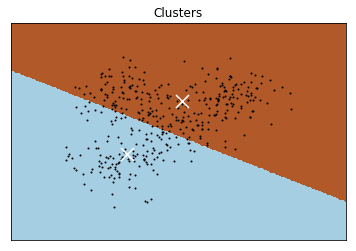

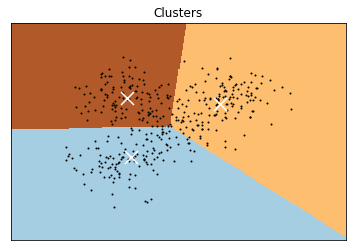

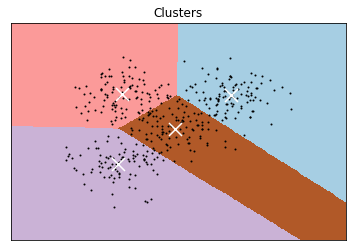

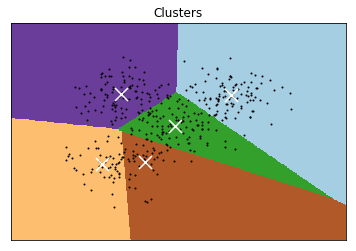

In [108]:
from sklearn.cluster import KMeans

for initial_center in initial_centers:
    kmeans = KMeans(n_clusters=initial_center.shape[0], init=initial_center, 
                   n_init=1, random_state=0, n_jobs=-1).fit(blobs_X)
    draw_clusters(blobs_X, kmeans.cluster_centers_, kmeans.predict)

In [126]:
class my_KMeans:
    def __init__(self, n_clusters, init):
        self.n_clusters = n_clusters
        self.cluster_centers_ = np.copy(init)
    
    def predict(self, X):
        return np.argmin(np.sum((X[None,:,:] - self.cluster_centers_[:,None,:]) ** 2, axis=-1), axis=0)
    
    def fit(self, X):
        prev_cluster_centers = np.zeros(self.cluster_centers_.shape)
        s = False
        while not np.allclose(prev_cluster_centers, self.cluster_centers_):
            prev_cluster_centers = np.copy(self.cluster_centers_)
            nearest_centers = self.predict(X)
            for i in range(self.cluster_centers_.shape[0]):
                self.cluster_centers_[i] = np.mean(X[nearest_centers == i], axis=0)    

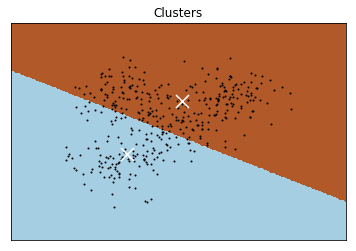

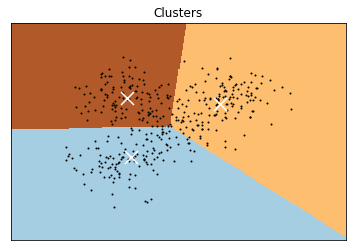

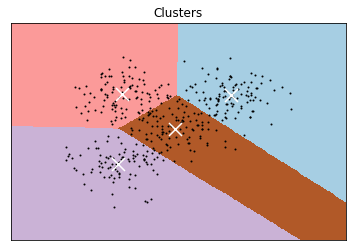

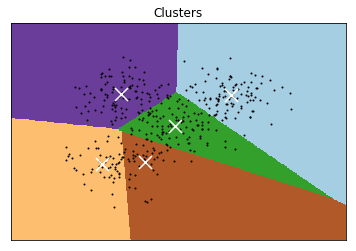

In [128]:
for initial_center in initial_centers:
    kmeans = my_KMeans(n_clusters=initial_center.shape[0], init=initial_center)
    kmeans.fit(blobs_X)
    draw_clusters(blobs_X, kmeans.cluster_centers_, kmeans.predict)

As we can see results are identical. It is kinda hard to say based on plots which clustering is better.